# An Analysis of Steam Video Games


## Introduction

Steam is probably the largest PC game digital distribution service. With so many games, users, and metadata, it's perfect for messing around with. I found two datasets on essentially the entire Steam library. The main one is __[leinstay's steam database](https://github.com/leinstay/steamdb)__. It compiles unique data that other, similar datasets didn't have. As described by the README, it's a "JSON file of all games available on Steam with prices and additional data from Steam Spy, GameFAQs, Metacritic, IGDB and HLTB. The data is automatically updated and uploaded to Github once a month." 

To add on the initial price and compensate for missing tags, I also used __[this dataset from Kaggle (account required)](https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022)__. Working with tags could potentially give a lot of insight.

Looking at various projects (and trying to work on them myself), I've found that tags seemed to be underutilized as a source of information. Steam tags are fascinating, and while I won't go too into depth on working with them, there's clearly a lot to work with once they're parsed.

### My Approach
In this tutorial, I'd like to focus on data cleaning, illustrating correlations, visualizations, and formatting. We'll be exploring the data in various ways, and building a clean dataset to do more work with in the future. I'll also be doing basic hypothesis testing to confirm or disprove correlation.

We won't necessarily walk through the data science pipeline in order, as it'll be more of an exploration along the way towards a finished product, but I'll point out relevant steps along the way.

### Imported Libraries
We'll be working with pandas and numpy download, clean, and organize the data. Seaborn, based on matplotlib will be used for visualizations. We'll use scipy's stats for hypothesis testing and the re library to extract the tags via regex. Finally, I'll be using the IPython's display library to work with formatting.

In [33]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
from IPython.display import HTML

## Importing the Datasets

The Data collection/curation step will be the simplest, as we're using already built datasets. Pandas can apparently read csvs easier than jsons, as it allows us to extract only the relevant columns. Notice how I set the delimiter to ';' as the data wasn't comma-separated, however. In addition, I imported the initial price as a float, but it still had decimal point issues. We'll fix those later.

The json will need to have a lot of the columns dropped.

In [34]:
# To save time and steps, I only imported relevant columns from the csv. 
game_data_git = pd.read_json("https://github.com/leinstay/steamdb/raw/main/steamdb.json")
game_data_kag = pd.read_csv("steam_games.csv", delimiter=";", dtype= {'Initial Price': float},
                            usecols=['App ID', 'Tags', 'Initial Price'])
print("\nGit Data:\n")
display(game_data_git)
print("\n\nKaggle Data:\n")
display(game_data_kag)


Git Data:



,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53976,1966310,https://store.steampowered.com/app/1966310,None,NaN,2022-04-22,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53977,1971880,https://store.steampowered.com/app/1971880,None,NaN,2022-04-22,None,None,2016-12-09,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53978,1971980,https://store.steampowered.com/app/1971980,None,NaN,2022-04-21,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53979,1976030,https://store.steampowered.com/app/1976030,None,NaN,2022-04-24,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN




Kaggle Data:



,App ID,Tags,Initial Price
0,10,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",999.0
1,1000000,"""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",999.0
2,1000010,"Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",1999.0
3,1000030,"Typing: 221, Management: 213, Casual: 209, Dif...",1999.0
4,1000040,"Action: 22, Casual: 22, Indie: 21, Simulation: 20",199.0
...,...,...,...
55686,999880,"Education: 22, VR: 6, Space: 5",0.0
55687,999890,"Casual: 21, Indie: 21, Adventure: 20",299.0
55688,999900,"Animation & Modeling: 25, 3D: 13",0.0
55689,999930,"Early Access: 21, Indie: 20, RPG: 20, Strategy...",499.0


## Prepping / Cleaning the Data

These datasets aren't perfect. The biggest issue is a lot of missing data. To manage and represent the data we'll need to clean and reformat much of it. When working on a data science project, you need to be careful of the missing values. 

We'll also be joining together the two datasets, which has it's own issues. As can be seen in the previous output, the Kaggle dataset has more games. With our data, it seems that it's mainly the obscure games that are missing the data that we're actually using. As such, simply dropping those rows is fine, as I'd like a picture of the mainstream picture anyways. Outliers won't help much.



### Dropping Columns

We won't actually be using most of the columns, so I'll be dropping them. I've also printed out the missing value counts so we can see how big of a deal the missing values are. As can be seen, many of the columns have the MAJORITY of values missing. 

In [35]:
# Check for missing values
print("\n\n\nMissing Values Count Kaggle Data:\n ")
print(game_data_kag.isnull().sum())

print("\n\n\nMissing Values Count Github Data:\n ")
print(game_data_git.isnull().sum())

# Dropping the unused columns in the git table
game_data_git.drop(inplace=True, columns=['store_url', 'store_promo_url', 'published_meta', 'published_stsp',
                                          'published_hltb', 'published_igdb', 'image', 'description',
                                          'voiceovers', 'gfq_url', 'gfq_rating_comment', 'gfq_length_comment',
                                          'hltb_url', 'meta_url', 'igdb_url', 'achievements', 'discount',
                                          'igdb_popularity', 'igdb_single', 'igdb_complete', 'gfq_length',
                                          'stsp_owners', 'stsp_mdntime', 'gfq_difficulty_comment', 'tags',
                                          'full_price', 'current_price', 'grnk_score', 'genres'])




Missing Values Count Kaggle Data:
 
App ID             0
Tags             135
Initial Price      0
dtype: int64



Missing Values Count Github Data:
 
sid                           0
store_url                     0
store_promo_url           46435
store_uscore              20519
published_store             150
published_meta            20378
published_stsp            34365
published_hltb            28150
published_igdb            33016
image                         0
name                          0
description                  49
full_price                 7164
current_price              7164
discount                  47452
platforms                     0
developers                   94
publishers                    0
languages                    17
voiceovers                29801
categories                   70
genres                        0
tags                      33608
achievements              25265
gfq_url                   21375
gfq_difficulty            41626
gfq_difficulty

### Joining the Datasets

Let's finally join the datasets. We'll be doing an inner merge using the store ID, since if they're not in both
they're probably too obscure to be of value anyways. An inner merge only keeps the rows with "on" values that are in both datasets. Since each one has different names for the id, we have to set the "on" arguments using the left_on and right_on arguments.

In [36]:
# Joining the two data tables. We'll do an inner merge, 
game_data = pd.merge(left=game_data_git, right=game_data_kag, how='inner', left_on='sid', right_on='App ID')

# Drop the App ID column as it's no longer needed
game_data.drop('App ID', inplace=True, axis=1)

### Dropping Rows

Let's clean up the rows a bit by dropping the games without any reviews. Once we get rid of those, let's also take the average scores to make it easier to draw insight from the various score metrics.

In [37]:
# Get rid of rows that have no review score
game_data.dropna(how='all', subset=['store_uscore', 'meta_score', 'meta_uscore',
                                    'igdb_score', 'gfq_rating', 'igdb_uscore'], inplace=True)

# Add average score columns
game_data['avg_uscore'] = game_data[['store_uscore', 'meta_uscore',
                                     'igdb_uscore', 'gfq_rating']].mean(axis=1)
game_data['avg_critic_score'] = game_data[['meta_score', 'igdb_score']].mean(axis=1)

### Fixing the Data

There's a bunch of issues with the data as is. The formatting and value types are not ideal for working with models and make it hard to work with visualizations. 

Firstly, The difficulty is measured by string descriptions. Difficulty can easily be described by a scale, so let's encode it using a simple find and replace. Second, the price decimal place is wrong, as it's two places too far to the right. Let's divide the column by 100 to fix it. We also need to scale up the GameFAQs reviews to match the others in scale (0-100). Finally, the published date needs to be in datetime format to more easily work with it.


In [38]:

# Encode the difficulties in a scale. There's encoders, but a simple find and replace works well here.
print(game_data['gfq_difficulty'].unique()) # See the values to encode

replace_dict = {'Just Right-Tough':2.5, 'Just Right':2, 'Easy-Just Right':1.5, 'Tough':3,
              'Tough-Unforgiving':3.5, 'Unforgiving':4, 'Easy':1, 'Simple':0, 'Simple-Easy':0.5}


game_data.replace({'gfq_difficulty':replace_dict}, inplace=True)

# Fix the initial price by dividing by 100
game_data['Initial Price'] = game_data['Initial Price'] / 100

# Format published data as datetime
game_data['published_store'] = pd.to_datetime(game_data['published_store'])

# Scale gfq_rating to be out of 100 like the others
game_data['gfq_rating'] = game_data['gfq_rating'] * 20

['Just Right-Tough' 'Just Right' 'Easy-Just Right' 'Tough' None
 'Tough-Unforgiving' 'Unforgiving' 'Easy' 'Simple' 'Simple-Easy']


 ## Exploratory Data Analysis
 
In this part, we'll be exploring our data via statistics, tables, and visualizations. There are many features in the data, so I produced whatever seemed interesting or jumped out at me. This dataset is very flawed due to its subjectivity and missing data (that we removed), but it's what we have to work with. I'm also unsure of the accuracy of the scraping or the exact methods with which each score was calculated. Still, this should give us some idea of general trends in gaming scores, prices, etc.

I'll print out the general statistics using describe(), but the visualizations make it easier to see things.

In [39]:
print(game_data.describe())

                sid  store_uscore  gfq_difficulty    gfq_rating   hltb_single  \
count  3.205600e+04  31999.000000    11740.000000  12801.000000  11307.000000   
mean   6.806296e+05     70.503641        2.066269     66.628170      8.872380   
std    3.060577e+05     19.670728        0.829407     17.031233     51.595316   
min    1.000000e+01      1.000000        0.000000     10.000000      1.000000   
25%    4.351475e+05     57.000000        1.500000     60.000000      1.000000   
50%    6.832350e+05     75.000000        2.000000     70.000000      4.000000   
75%    9.260925e+05     86.000000        2.500000     78.200000      9.000000   
max    1.275630e+06    100.000000        4.000000    100.000000   5149.000000   

       hltb_complete   meta_score  meta_uscore   igdb_score   igdb_uscore  \
count    9868.000000  3574.000000  5809.000000  4337.000000  12032.000000   
mean       24.497973    71.480134    68.742124    70.322804     64.760140   
std       114.968423    11.062782    14

There are many different metrics for review scores in our dataset. I've made a violin plot for each type to see their distributions below. As expected, most of them have similar, Gaussian distributions. IGDB user scores seem a bit all over the place. I've never heard of the site, so I can't really speculate as to why it would be this way. 

The steam scores have a much flatter distribution. This is likely due to the way it was generated and the popularity of Steam. As I tested myself, the column represents the ratio positive reviews / total reviews (Steam reviews are either positive or negative). This would explain why it's so different from the others, as there's no 'just okay' option so everything probably balanced out.

Regardless, all of them have very similar means, although the skew was different for the IGDB user scores. This is somewhat expected, as a mean of around 75 (or a C) makes sense for a value out of 100.

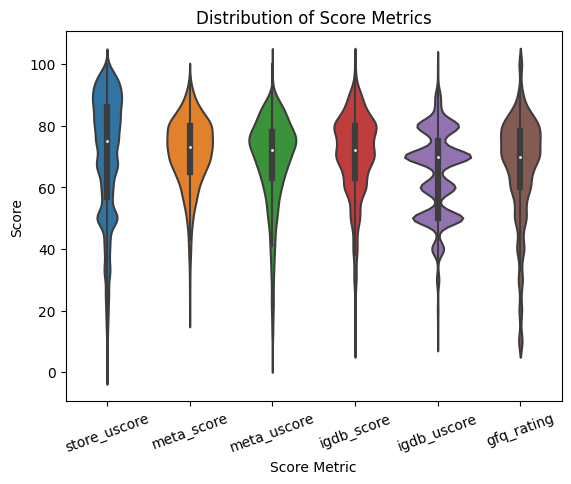

In [40]:
# Violin plot to show distribution of scores. In matplotlib we'd have to melt the scores first, but not
# with seaborn
scor_dist_plt = sns.violinplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']])
scor_dist_plt.set(xlabel='Score Metric', ylabel='Score', title='Distribution of Score Metrics')

# Rotate the x-axis labels to see them better
scor_dist_plt.tick_params(axis='x',rotation=20)

Next, I thought it'd be a cool visualization to see a pair plot with high positive covariances. Most of them are almost perfectly linear, with a clear high correlation. The igdb scores and the steam scores seem less correlated though, likely due to their methods of rating. GameFAQs and the Steam score also have less of a positive covariance.

The histograms on the diagonal plots help give some context as well. The igdb_uscore reflects the weird distribution we saw in the violin plot above. Apparently their users really like certain scores.

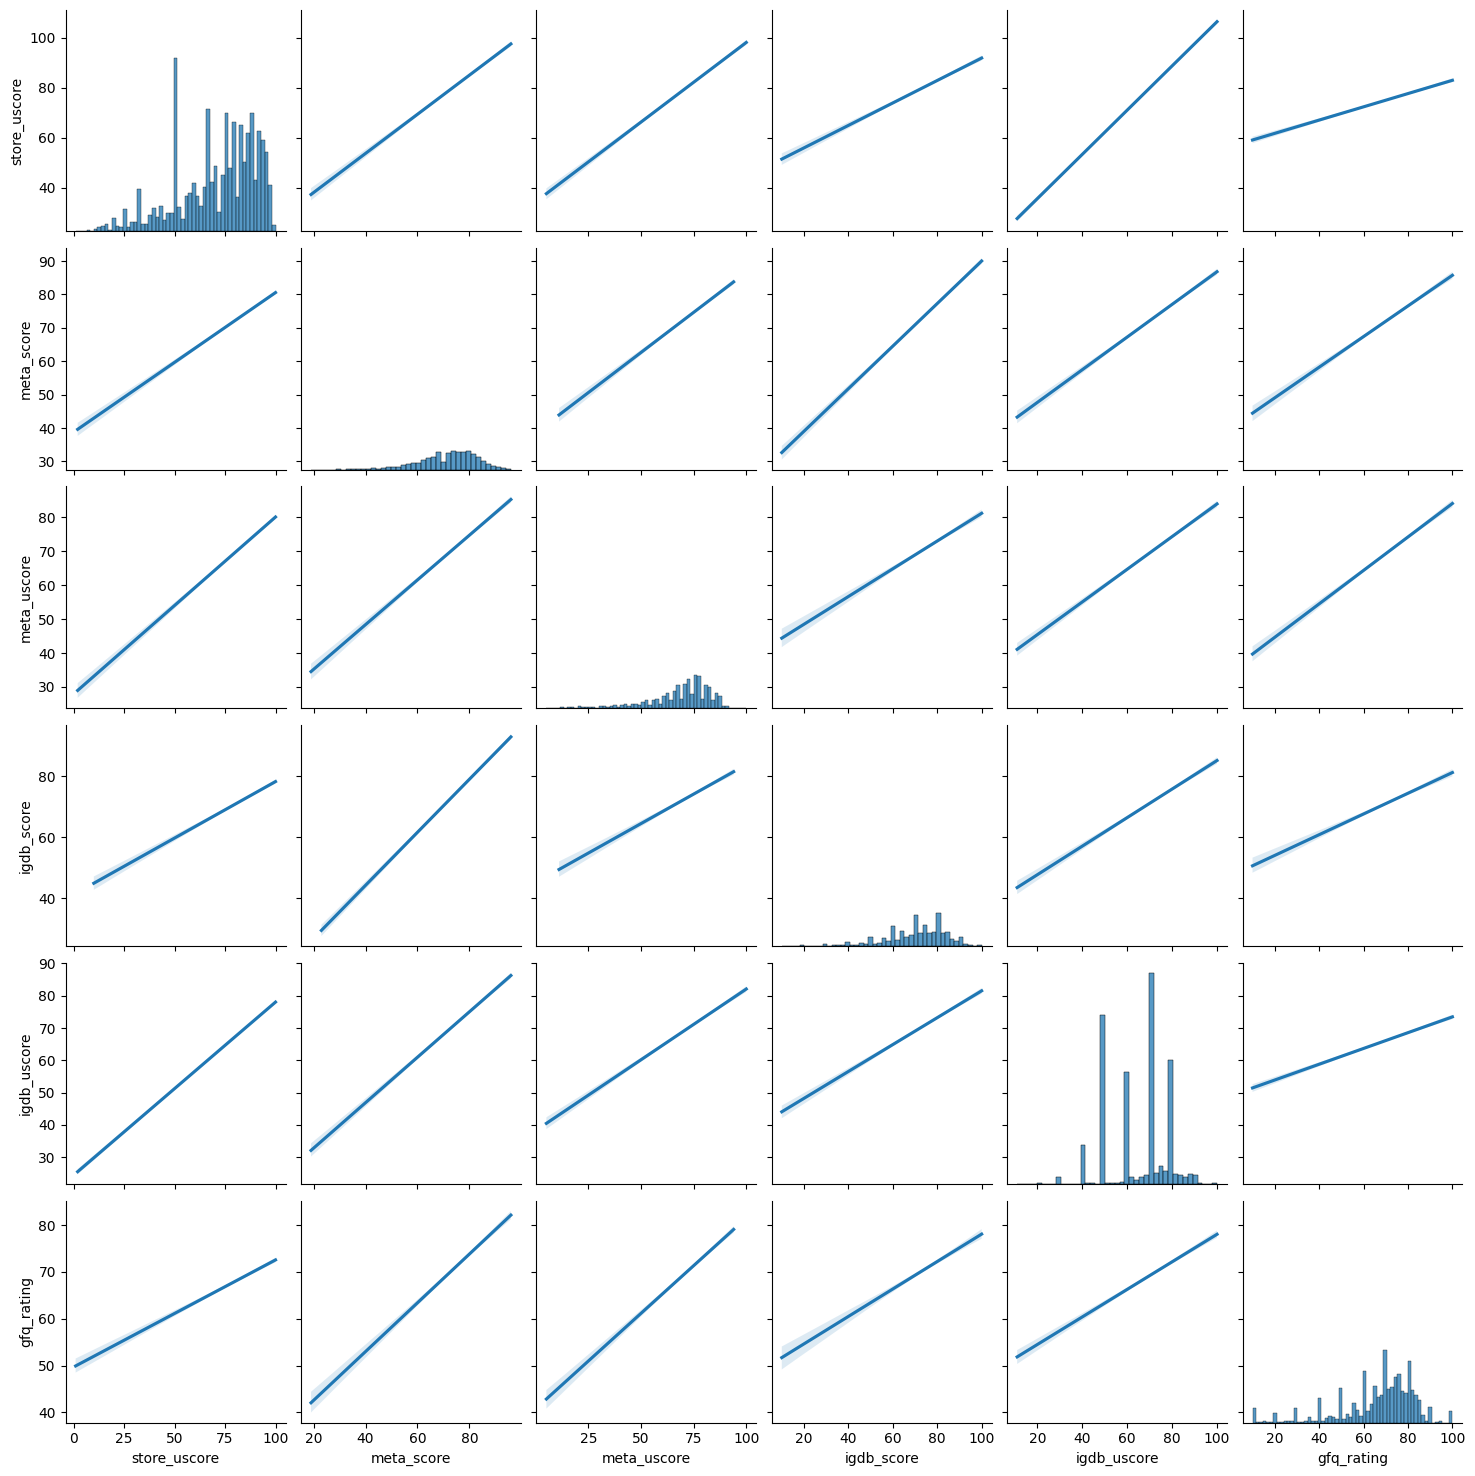

In [41]:
# Plots to see relationship between the various scores. We should expect to see large positive covariances.
# Scatter turned off for clarity.
score_pair_plot = sns.pairplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']],
                               kind='reg', dropna=True, plot_kws=dict(scatter=False))

I thought there would be correlation between game length and difficulty, but it seems that there isn't much of one, even after removing outliers. I printed out the actual correlations for this one as, since the x and y are on two different scales, the regression line as a visual can be surprisingly misleading based on the setup of the plot. For instance, if the y-scale was lower, the line would look like it has a much higher slope. A

Correlation coeff. between difficulty and game length (single): 
0.1766718991202775

Correlation coeff. between difficulty and game length (complete): 
0.21939791220468677


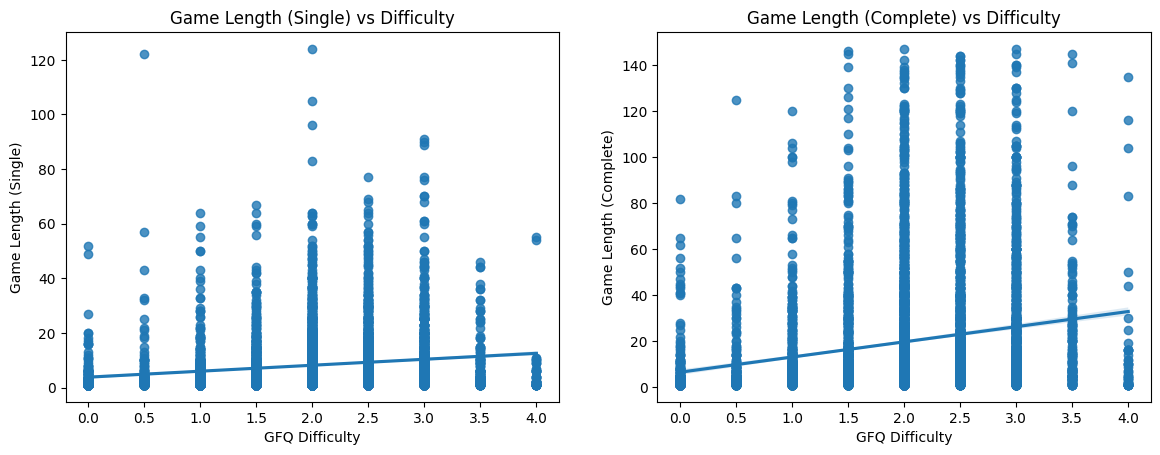

In [42]:
# Surprisingly, it seems that there's not much correlation between length and difficulty.

# Remove outliers (length greater than 150 hours, since if the game takes longer than that, it's just being
# annoying)
len_diff_df = game_data[(game_data['hltb_single'] < 150) & (game_data['hltb_complete'] < 150)]

# Create two regression plots
f, axes = plt.subplots(1, 2)
diff_len_plt1 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_single', ax=axes[0])
diff_len_plt2 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_complete', ax=axes[1])

f.set(figwidth=14)
diff_len_plt1.set(xlabel='GFQ Difficulty', ylabel='Game Length (Single)', title='Game Length (Single) vs Difficulty')
diff_len_plt2.set(xlabel='GFQ Difficulty', ylabel='Game Length (Complete)', title='Game Length (Complete) vs Difficulty')

# Print out the correlation coefficients
print("Correlation coeff. between difficulty and game length (single): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_single']))
print("\nCorrelation coeff. between difficulty and game length (complete): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_complete']))

Here I wanted to give an example of where I think the HTML output provides an opportunity to be simple. Visualizations are great, but in a large dataset where I might want to seek out a specific value, sometimes I think an alphabetically sorted, scrollable table is perfect. 

In this instance, I'm examining the relationship between publishers/developers and their number of highly ranked games out of their total. I used some HTML formatting to make it easy to look through. I was personally interested in seeing the numbers of certain publishers/developers, and to quickly scroll to that value (while skimming others) can be just as impactful as a visualization.

It's interesting to see the numbers, but it's important to remember that the data is subjective, averaged, and incomplete. Activision, for instance, only has 1 high-rated game. This may be a fair measure of their games, but it could also be that users review-bombed them or that some of their games were missing from my dataset. This is probably an issue one could have with any conclusion in most datasets though.

In [43]:
# Let's examine the game scores by large publishers and developers.
# Normally I'd do this as a visualization, but as this will be an interactive webp
# First, add a new column that's the average of the critic and the users. Note that this will simply
# choose whichever one's available if one is missing.
game_data['avg_score'] = game_data[['avg_uscore', 'avg_critic_score']].mean(axis=1)

# Get the sum total of games by developer and publisher
total_pubs = pd.DataFrame(game_data.groupby(by='publishers').size())
total_devs = pd.DataFrame(game_data.groupby(by='developers').size())

# Get the totals of games that have high scores by publishers and developers
hi_score_by_pub = game_data[game_data['avg_score'] >= 85].groupby(by='publishers').size()
hi_score_by_dev = game_data[game_data['avg_score'] >= 85].groupby(by='developers').size()

# Merge into single dataframes (renaming columns and resetting indexes is necessary in this case)
total_pubs = total_pubs.merge(hi_score_by_pub.to_frame(), on='publishers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'}).reset_index()
total_devs = total_devs.merge(hi_score_by_dev.to_frame(), on='developers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'}).reset_index()

# Sort the dataframes and drop the rows with barely any games or with no reviews
total_devs = total_devs[total_devs['Total Games'] >= 10].dropna().sort_values(by=['developers'])
total_pubs = total_pubs[total_pubs['Total Games'] >= 10].dropna().sort_values(by=['publishers'])

# Drop the first row of publishers, as it combined all publishers with just empty strings into one
total_pubs = total_pubs.tail(-1)

# Convert High Scoring Games column from floats to ints
total_devs['High Scoring Games'] = total_devs['High Scoring Games'].astype(int)
total_pubs['High Scoring Games'] = total_pubs['High Scoring Games'].astype(int)

display(
    HTML(
        "<h4> Developers:\n </h4>" +
        "<div style='height: 200px; width: 100px; overflow: auto; width: fit-content'; display: inline-block;>" +
        total_devs.to_html(index=False, justify='justify-all') + 
        "</div>" +
        "<h4> \nPublishers:\n </h4>" +
        "<div style='height: 200px; overflow: auto; width: fit-content'; display: inline-block;>" +
        total_pubs.to_html(index=False, justify='justify-all') + 
        "</div>"
    )
)


developers,Total Games,High Scoring Games
07th Expansion,10,7
10tons Ltd,14,1
AFBIK Studio,15,3
Anarchy Enterprises,13,1
Andy Jurko,14,4
Arc System Works,27,4
Astronomic Games,13,3
Blaze Epic,10,2
Blender Games,54,1
Boogygames Studios,18,3


Steam has been around for almost 20 years, which I think is a large enough time to see a real change in trends. As such, I wanted to see how scores and prices changed over time. I used histplots with kernel density estimation to clearly show the distributions in multiple dimensions.

An interesting insight that can be gleaned from these plots is the increase in low-cost and free/mium games since 2016.

[None]

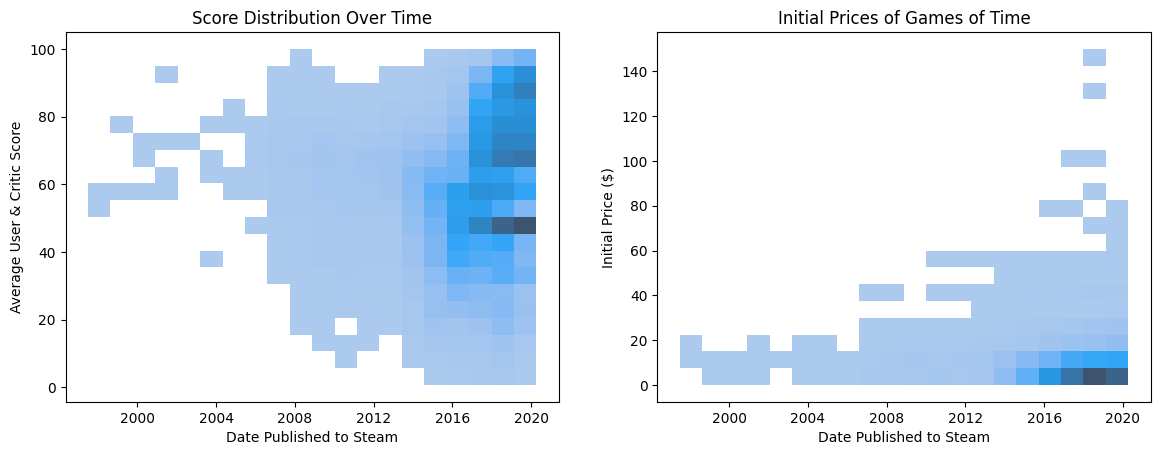

In [44]:
# Show score distribution over time using a kdeplot. We'll remove anything over 150 as anything 
# over that is just stupid, and an outlier that won't help.

f, axes = plt.subplots(1, 2)
score_trend_plt = sns.histplot(game_data[game_data['Initial Price'] <= 150], x='published_store', bins=20,
                              y='avg_score', kde=True, ax=axes[0])
score_trend_plt.set(xlabel='Date Published to Steam', ylabel='Average User & Critic Score',
                   title='Score Distribution Over Time', )

score_trend_plt = sns.histplot(game_data[game_data['Initial Price'] <= 150], x='published_store', bins=20,
                               y='Initial Price', kde=True,  ax=axes[1])
score_trend_plt.set(xlabel='Date Published to Steam', ylabel='Initial Price ($)',
                   title='Initial Prices of Games of Time')
f.set(figwidth=14)

Finally, let's examine the relationship between initial price and user score. As can be seen below, it does seem that there's actually a positive correlation, especially once you get in the 20-75 range. Looks like after that the high prices are definitely not worth it.

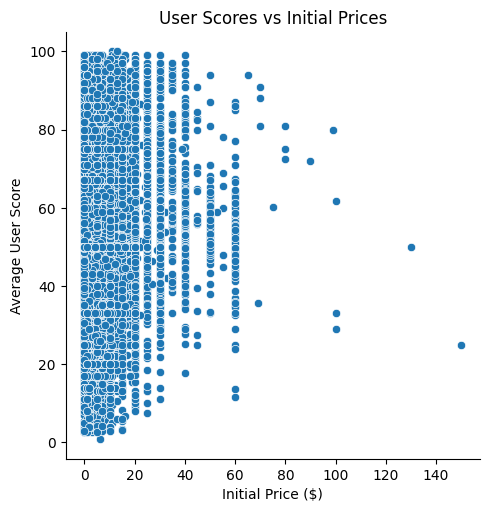

In [45]:
# See if there's a correlation between initial price and user score
score_price_plt = sns.relplot(game_data[game_data['Initial Price'] <= 150], x='Initial Price', y='avg_uscore')
score_price_plt.set(xlabel='Initial Price ($)', ylabel='Average User Score', title='User Scores vs Initial Prices')

## Working with the Tags

Tags are a fascinating source of data. They'll require much more effort in parsing due to their format, but we can see a lot from them. At first, I considered including the amounts of tags. I planned to add { and } to each cell and extract and eval as dictionaries. After thinking about it, I decided that the amounts of tags weren't useful, as the generic tags would always be higher, and it's the unique characteristics that I'm really interested in. 

Instead, I'll turn the cells into arrays of the tags via regex, and use stack and dummy variables to turn them into categorical boolean variables.

In [46]:
# First, let's remember what we're working with
display(game_data['Tags'])

# As was seen previously, there were some NaNs in the tags. Let's remove them.
game_data.dropna(subset=['Tags'], inplace=True)
# The dtype of Tags is object. We need to convert it to string to use regex
game_data['Tags'] = game_data['Tags'].astype('string')

# For each element in the Tags column, we'll capture all tags by capture groups using the regex below.
# I searched beforehand to make sure there weren't any : or , in the tag names.
# We'll set the returned Series of arrays as a new Series.
clean_tags = game_data['Tags'].apply(lambda x: re.findall(r"([^,:]+): \d+", x))
display(clean_tags)

0        Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...
1        Action: 754, FPS: 312, Multiplayer: 264, Class...
2        FPS: 791, World War II: 255, Multiplayer: 205,...
3        Action: 631, FPS: 142, Classic: 109, Multiplay...
4        FPS: 893, Action: 335, Classic: 262, Sci-fi: 2...
                               ...                        
32714    Co-op Campaign: 120, Family Friendly: 113, Loc...
32716    Strategy: 32, Turn-Based: 12, Dark Fantasy: 11...
32717    Hidden Object: 114, Education: 109, Puzzle: 10...
32720    Simulation: 209, Free to Play: 203, Casual: 19...
32723    Free to Play: 78, Simulation: 64, Action: 52, ...
Name: Tags, Length: 32056, dtype: object

0        [Action,  FPS,  Multiplayer,  Shooter,  Classi...
1        [Action,  FPS,  Multiplayer,  Classic,  Hero S...
2        [FPS,  World War II,  Multiplayer,  Shooter,  ...
3        [Action,  FPS,  Classic,  Multiplayer,  Shoote...
4        [FPS,  Action,  Classic,  Sci-fi,  Singleplaye...
                               ...                        
32714    [Co-op Campaign,  Family Friendly,  Local Co-O...
32716    [Strategy,  Turn-Based,  Dark Fantasy,  Diffic...
32717    [Hidden Object,  Education,  Puzzle,  Card Gam...
32720    [Simulation,  Free to Play,  Casual,  Sailing,...
32723    [Free to Play,  Simulation,  Action,  Casual, ...
Name: Tags, Length: 32039, dtype: object

Now, what we're going to do is turn each array into a series, and then stack them into a single multi-index Series

In [47]:
temp_tags = clean_tags.apply(pd.Series).stack()
temp_tags


0      0                Action
       1                   FPS
       2           Multiplayer
       3               Shooter
       4               Classic
                   ...        
32723  8                Horror
       9        Sexual Content
       10     Great Soundtrack
       11               Nudity
       12                Co-op
Length: 314840, dtype: object

In [48]:
# Create dummy variables and sum at level = 0 to get rid of the multi index
temp_tags = pd.get_dummies(temp_tags).sum(level=0)
temp_tags 

/tmp/ipykernel_624/4250580474.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  temp_tags = pd.get_dummies(temp_tags).sum(level=0)


,"""1990s""","""Beat em up""","""Shoot Em Up""",1980s,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,Word Game,World War II,Wrestling,Zombies
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32714,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32717,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32720,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Now let's add the tags to game_data
game_data = game_data.merge(temp_tags, right_index=True, left_index=True)

## Hypothesis Testing

We have a lot of data to work with, but I'd like to just give a basic example of examining the data for correlations. This is trivial, but I think it's a good illustration of a starting point to work with the tags. A classic gamer stereotype is strong positive or negative reactions to female protagonists. To use the concepts of hypothesis testing, let's say our null hypothesis is that there isn't a large positive (or negative) correlation between games that are tagged Female Protagonist and the average user score. Let's say our alternative hypothesis is the opposite.

First, let's look at a visual representation of the relationship. We'll be using a histplot to see the distributions for games tagged as such. It's not necessarily ideal due to the space between, but I liked the way it showed the distribution clearly and separately. Let's also print the average score for both cases.

As an aside, I did try using MCA/PCA/CA to reduce the dimensions of the tag columns to make things easier to work with, but it seems that the variance is distributed very widely across the data. It doesn't seem that there's much covariance in the tags. It's also possible that I used it wrong, which is why I didn't include it.

Female Protagonist
0    59.046964
1    62.543631
Name: avg_uscore, dtype: float64

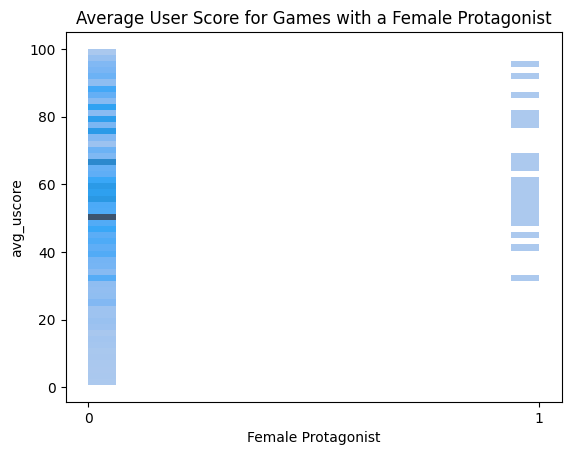

In [50]:
# Creating a histplot to show distributions for various tags
fem_score_plt = sns.histplot(game_data.dropna(subset=['avg_uscore', 'Female Protagonist']),
                             x='Female Protagonist', y='avg_uscore')
fem_score_plt.set(title="Average User Score for Games with a Female Protagonist")
plt.xticks([0, 1])
# We'll also use groupby to show the average scores for whether the game has been tagged with
# Female Protagonist (1) or not (0).
game_data.groupby(by='Female Protagonist')['avg_uscore'].mean()

The average score for female protagonist games is a few points higher. It seems there might be something there in terms of a positive correlation, but it could be due to the large difference in totals or other factors. Let's try a hypothesis test. We'll use the point biserial correlation coefficient, as it's used for finding correlation between continuous and binary data. The nan values must be dropped first for it to work.

In [51]:
hyp_test_data = game_data.dropna(subset=['avg_uscore', 'Female Protagonist'])
stats.pointbiserialr(hyp_test_data['avg_uscore'], hyp_test_data['Female Protagonist'])

PointbiserialrResult(correlation=0.005249864331329775, pvalue=0.3474113847872262)

As it turns out there wasn't much of a correlation, and even that value is uncertain due to the p-value being higher than 0.05. As such, we can't throw away the null hypothesis that there isn't a correlation between user scores and games tagged Female Protagonist. We could try the same approach with many other tags, but I think the concept is clear.

## Conclusion

We started with relatively messy data, at least, compared to where we ended up. The cleaned data can be found __[here](https://github.com/Rilay9/Rilay9.github.io)__. I've illustrated how to get, clean, organize, visualize, and explore such a dataset. There is much more that could be done, especially with the tags. Still, it was cool to mess around with the data, and the various techniques can certainly be applied to other projects.

In addition, the insights aren't necessarily definitive. There's too much noise and subjectivity for the basic fixes I used to ensure accurate results. Have a try yourself. Good luck!